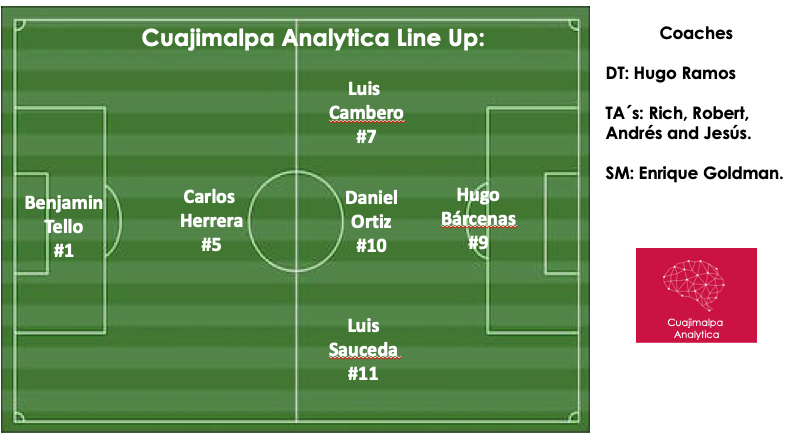

In [1]:
from IPython.display import Image
Image("presentación.png")

# Predicting wages with multiple linear regression

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Data cleaning

-We drop missing values

-We consider only players that make more than 5000 eur at month

-We rescale wages by taking its natural logarthim (common practice in labor economics for the estimation of wage equations)

-We take age to the square as wages may incresse with age, reach a maximum, and then go down.

-We write our clean data set under the name "players_18_BTB"

In [4]:
fifa_2018_df=pd.read_csv("datasets/players_18.csv",usecols = [2,4,9,10,11,13,14,16,18,31,32,33,34,35,36])
fifa_2018_df=fifa_2018_df.dropna()
fifa_2018_df=fifa_2018_df.loc[fifa_2018_df['wage_eur']>5000]
fifa_2018_df['log_wage']=np.log(fifa_2018_df['wage_eur'])
fifa_2018_df['age2']=np.power((fifa_2018_df['age']),2)
fifa_2018_df = fifa_2018_df.reset_index(drop=True)
fifa_2018_df.to_csv(r'datasets\players_18_BTB.csv')
fifa_2018_df.head()

short_name  age                 club  overall  potential  wage_eur  \
0  Cristiano Ronaldo   32          Real Madrid       94         94    565000   
1           L. Messi   30         FC Barcelona       93         93    565000   
2             Neymar   25  Paris Saint-Germain       92         94    280000   
3          L. Suárez   30         FC Barcelona       92         92    510000   
4     R. Lewandowski   28    FC Bayern München       91         91    355000   

  player_positions  international_reputation  skill_moves  pace  shooting  \
0           LW, ST                         5            5  90.0      93.0   
1               RW                         5            4  89.0      90.0   
2               LW                         5            5  92.0      84.0   
3               ST                         5            4  82.0      90.0   
4               ST                         4            3  81.0      88.0   

   passing  dribbling  defending  physic   log_wage  age2  
0     82.0       90.0       33.0    80.0  13.244581  1024  
1     86.0       96.0       26.0    61.0  13.244581   900  
2     79.0       95.0       30.0    60.0  12.542545   625  
3     79.0       87.0       42.0    81.0  13.142166   900  
4     75.0       86.0       38.0    82.0  12.779873   784

In [5]:
#Number of remaining observations
len(fifa_2018_df.index)

6924

# Multiple linear regression

In [6]:
# Assign the data to X and y
X = fifa_2018_df[["age", "age2", "overall", "potential", "international_reputation", "skill_moves", "pace", "shooting", "passing", "dribbling", "defending","physic"]]
y = fifa_2018_df["log_wage"].values.reshape(-1, 1)
print(X.shape, y.shape)

(6924, 12) (6924, 1)


In [7]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

### END SOLUTION

In [8]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [9]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.586187707372777
Testing Score: 0.6123505841891154


In [10]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

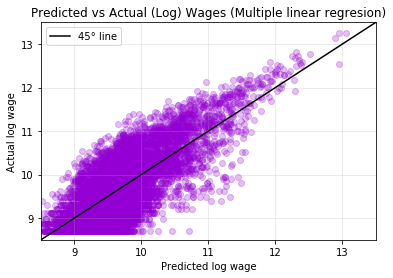

In [11]:
#We plot predicted against actual (log) Wages.
fig, ax = plt.subplots()
ax.scatter(model.predict(X), y, c='darkviolet', alpha=0.25)
plt.axis([8.5, 13.5, 8.5, 13.5])
line = mlines.Line2D([0, 14], [0, 14], color='black', label='45° line')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.title("Predicted vs Actual (Log) Wages (Multiple linear regresion)")
plt.xlabel("Predicted log wage")
plt.ylabel("Actual log wage")
plt.grid(linestyle='-', alpha=0.3)
leg = ax.legend();

# Save Figure
plt.savefig("Wages_LR.png")

# Prints the scatter plot to the screen
plt.show()

In [12]:
predic=model.predict(X)
fifa_2018_df['predic'] = predic 
fifa_2018_df=fifa_2018_df.loc[fifa_2018_df['wage_eur']>250000]

<Figure size 432x288 with 0 Axes>

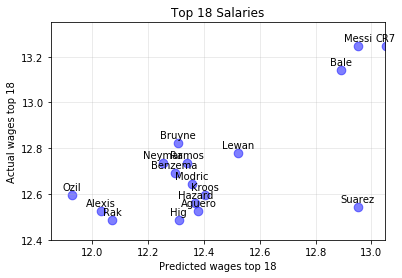

In [13]:
#Labeling data points to understand better what's going on
plt.clf()
xs = fifa_2018_df["predic"]
ys = fifa_2018_df["log_wage"]
fig, ax = plt.subplots()
# 'bo-' means blue color, round points, solid lines
plt.scatter(xs,ys, marker="o", facecolors="blue", alpha=0.5, s=75)
plt.grid(linestyle='-', alpha=0.3)
#plt.title("Budget exercised in Police vs Number of felonies")
plt.title("Top 18 Salaries")
plt.xlabel("Predicted wages top 18")
plt.ylabel("Actual wages top 18")
abreviaturas=["CR7", "Messi", "Suarez","Bale", "Lewan","Kroos","Modric","Aguero", "Ramos","Hazard","Benzema", "Bruyne", "Neymar", "Hig", "Rak", "Alexis" , "Ozil"]
plt.axis([11.85, 13.05, 12.4, 13.35])
#Labeling dots
i=0
# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys):
    label = abreviaturas[i]
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    i=i+1 

    
# Save Figure

plt.savefig("nombres_top_wages.png")


plt.show();

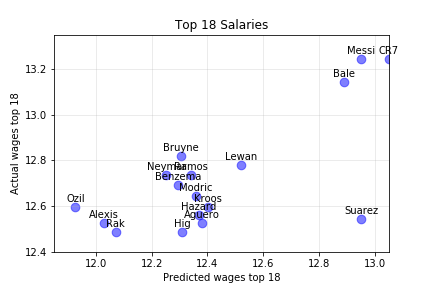

In [14]:
Image("nombres_top_wages.png")